# Airline Ticket Price Predicition

![Alt Text](image.gif)

## TABLE OF CONTENTS 
    
* [1. IMPORTING LIBRARIES](#1)
    
* [2. LOADING DATA](#2)
    
* [3. DATA CLEANING](#3)
    
* [4. DATA PREPROCESSING](#4)   
    
* [5. Feature Selection](#5) 
      
* [6. Regression](#6)
    
* [7. EVALUATING MODELS](#7)
    
* [8. PROFILING](#8)
    
* [9. CONCLUSION](#9)
    
* [10. END](#10)

In [237]:
#Importing the Libraries

# data processing
import pandas as pd

# for numerical processing of arrays
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot,iplot,init_notebook_mode,download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.express as px

#warnings
import warnings 
warnings.filterwarnings('ignore')

# Algorithms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

In [238]:
data_train=pd.read_excel("C:\\Users\\Prajwal\\Downloads\\Data_Train.xlsx")
data_test=pd.read_excel("C:\\Users\\Prajwal\\Downloads\\Test_set.xlsx")

In [239]:
data=pd.concat([data_train,data_test])
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [240]:
print("\n EDA on Complete dataset\n")
print("*"*90)
print("\nFeatures\columns:\n {}".format(data.columns))
print("*"*90)
print("\n\nNo of Rows: {}".format(data.shape[1]))
print("*"*90)
print("\n\nData Type: \n {}".format(data.dtypes))
print("*"*90)
print("\nContains nan values in the cells: {}\n".format(data.isna().values.any()))
print("*"*90)
print("\nTotal Empty cells by columns :\n{}".format(data.isna().sum()),"\n\n")
print("*"*90)


 EDA on Complete dataset

******************************************************************************************

Features\columns:
 Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')
******************************************************************************************


No of Rows: 11
******************************************************************************************


Data Type: 
 Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object
******************************************************************************************

Contains nan values in the cells: True

**************

In [241]:
data.shape

(13354, 11)

In [242]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Airline,13354,12,Jet Airways,4746,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date_of_Journey,13354,44,18/05/2019,633,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,13354,5,Delhi,5682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,13354,6,Cochin,5682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Route,13353,132,DEL → BOM → COK,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_Time,13354,223,18:55,288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_Time,13354,1451,19:00,536,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,13354,374,2h 50m,672,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Stops,13353,5,1 stop,7056,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Additional_Info,13354,10,No info,10493,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [243]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [244]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [245]:
data.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [246]:
data[data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0


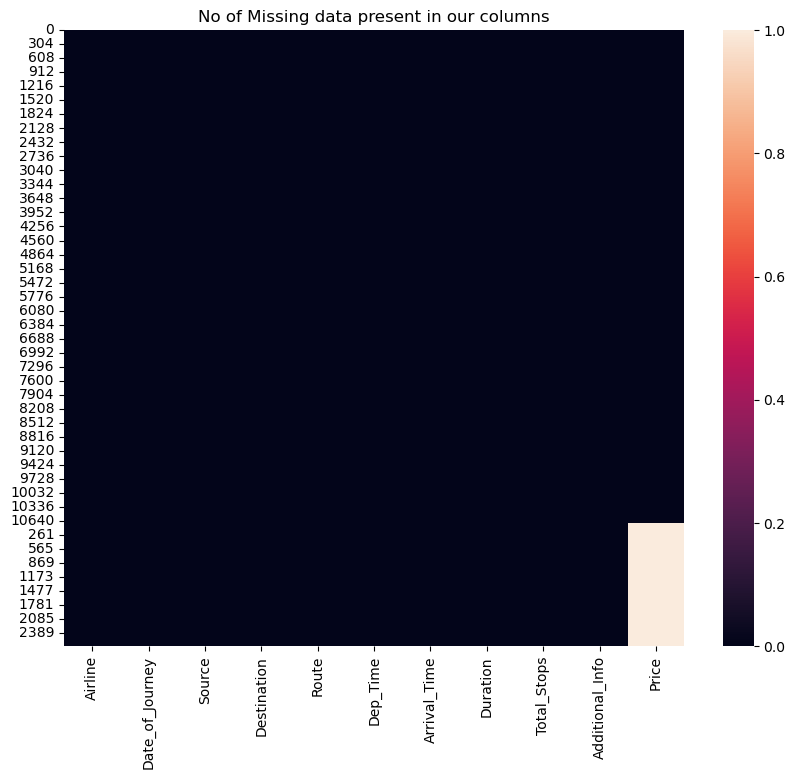

In [247]:
plt.figure(figsize=(10,8))
sns.heatmap(data.isna())
plt.title("No of Missing data present in our columns")
plt.show()

In [248]:
def change_into_datatime(col):
    data[col]=pd.to_datetime(data[col])

for feature in ['Dep_Time', 'Arrival_Time','Date_of_Journey']:
    change_into_datatime(feature)

data['Journey_day']=(data['Date_of_Journey'].dt.day)
data['Journey_month']=(data['Date_of_Journey'].dt.month)
data['Journey_year']=(data['Date_of_Journey'].dt.year)

In [249]:
def extract_hour_min(data,col):
    data[col+'_hour']=data[col].dt.hour
    data[col+'_minute']=data[col].dt.minute
    
    

    return data.head()

extract_hour_min(data,'Dep_Time')
extract_hour_min(data,'Arrival_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-05-09 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-05-09 05:50:00,2024-05-09 13:15:00,7h 25m,2 stops,No info,7662.0,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-05-09 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882.0,9,6,2019,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-05-09 18:05:00,2024-05-09 23:30:00,5h 25m,1 stop,No info,6218.0,12,5,2019,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-05-09 16:50:00,2024-05-09 21:35:00,4h 45m,1 stop,No info,13302.0,1,3,2019,16,50,21,35


In [250]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute'],
      dtype='object')

In [251]:
cols_to_drop=['Dep_Time','Arrival_Time','Date_of_Journey']
data.drop(cols_to_drop,axis=1,inplace=True)
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,16,50,21,35


In [252]:
data.shape

(13354, 15)

In [253]:
def flight_dep_time(x):
    if (x>4) and (x<=8):
        return "Early Morning"
    elif (x>8) and (x<=12):
        return "Morning"
    elif (x>12) and (x<=16):
        return "Noon"
    elif (x>16) and (x<=20):
        return "Evening"
    elif (x>20) and (x<=24):
        return "Night"
    else:
        return "Late Nigth"   

In [254]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts()

Dep_Time_hour
Early Morning    3578
Evening          2936
Morning          2775
Noon             2193
Night            1300
Late Nigth        572
Name: count, dtype: int64

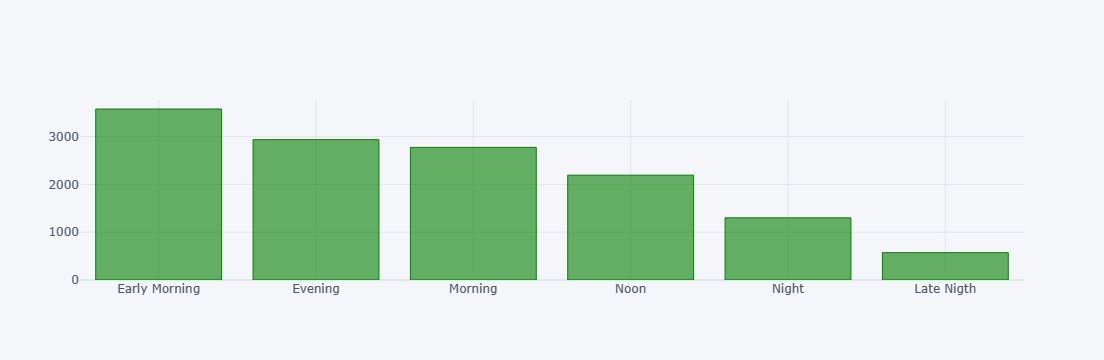

In [255]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind='bar',color='green')

**Inferences:**
* The departure times of flights follow a fascinating pattern, with the majority scheduled for early morning, followed by evening, morning again, noon, and night, with late night flights being the least common.

In [256]:
data['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
         ...   
2666    23h 55m
2667     2h 35m
2668     6h 35m
2669    15h 15m
2670    14h 20m
Name: Duration, Length: 13354, dtype: object

In [257]:
def processing_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' + '0m'
        
    return x
            

In [258]:
data['Duration']=data['Duration'].apply(processing_duration)

In [259]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
         ...   
2666    23h 55m
2667     2h 35m
2668     6h 35m
2669    15h 15m
2670    14h 20m
Name: Duration, Length: 13354, dtype: object

In [260]:
#spliting them separatly with hours and minuts
data['Duration_hours']=data['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]))
data['Duration_minutes']=data['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]))
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882.0,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,16,50,21,35,4,45


In [261]:
#Converts flight duration strings into total minutes by using eval
data['Duration_total_min']=data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882.0,9,6,2019,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,18,5,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,16,50,21,35,4,45,285


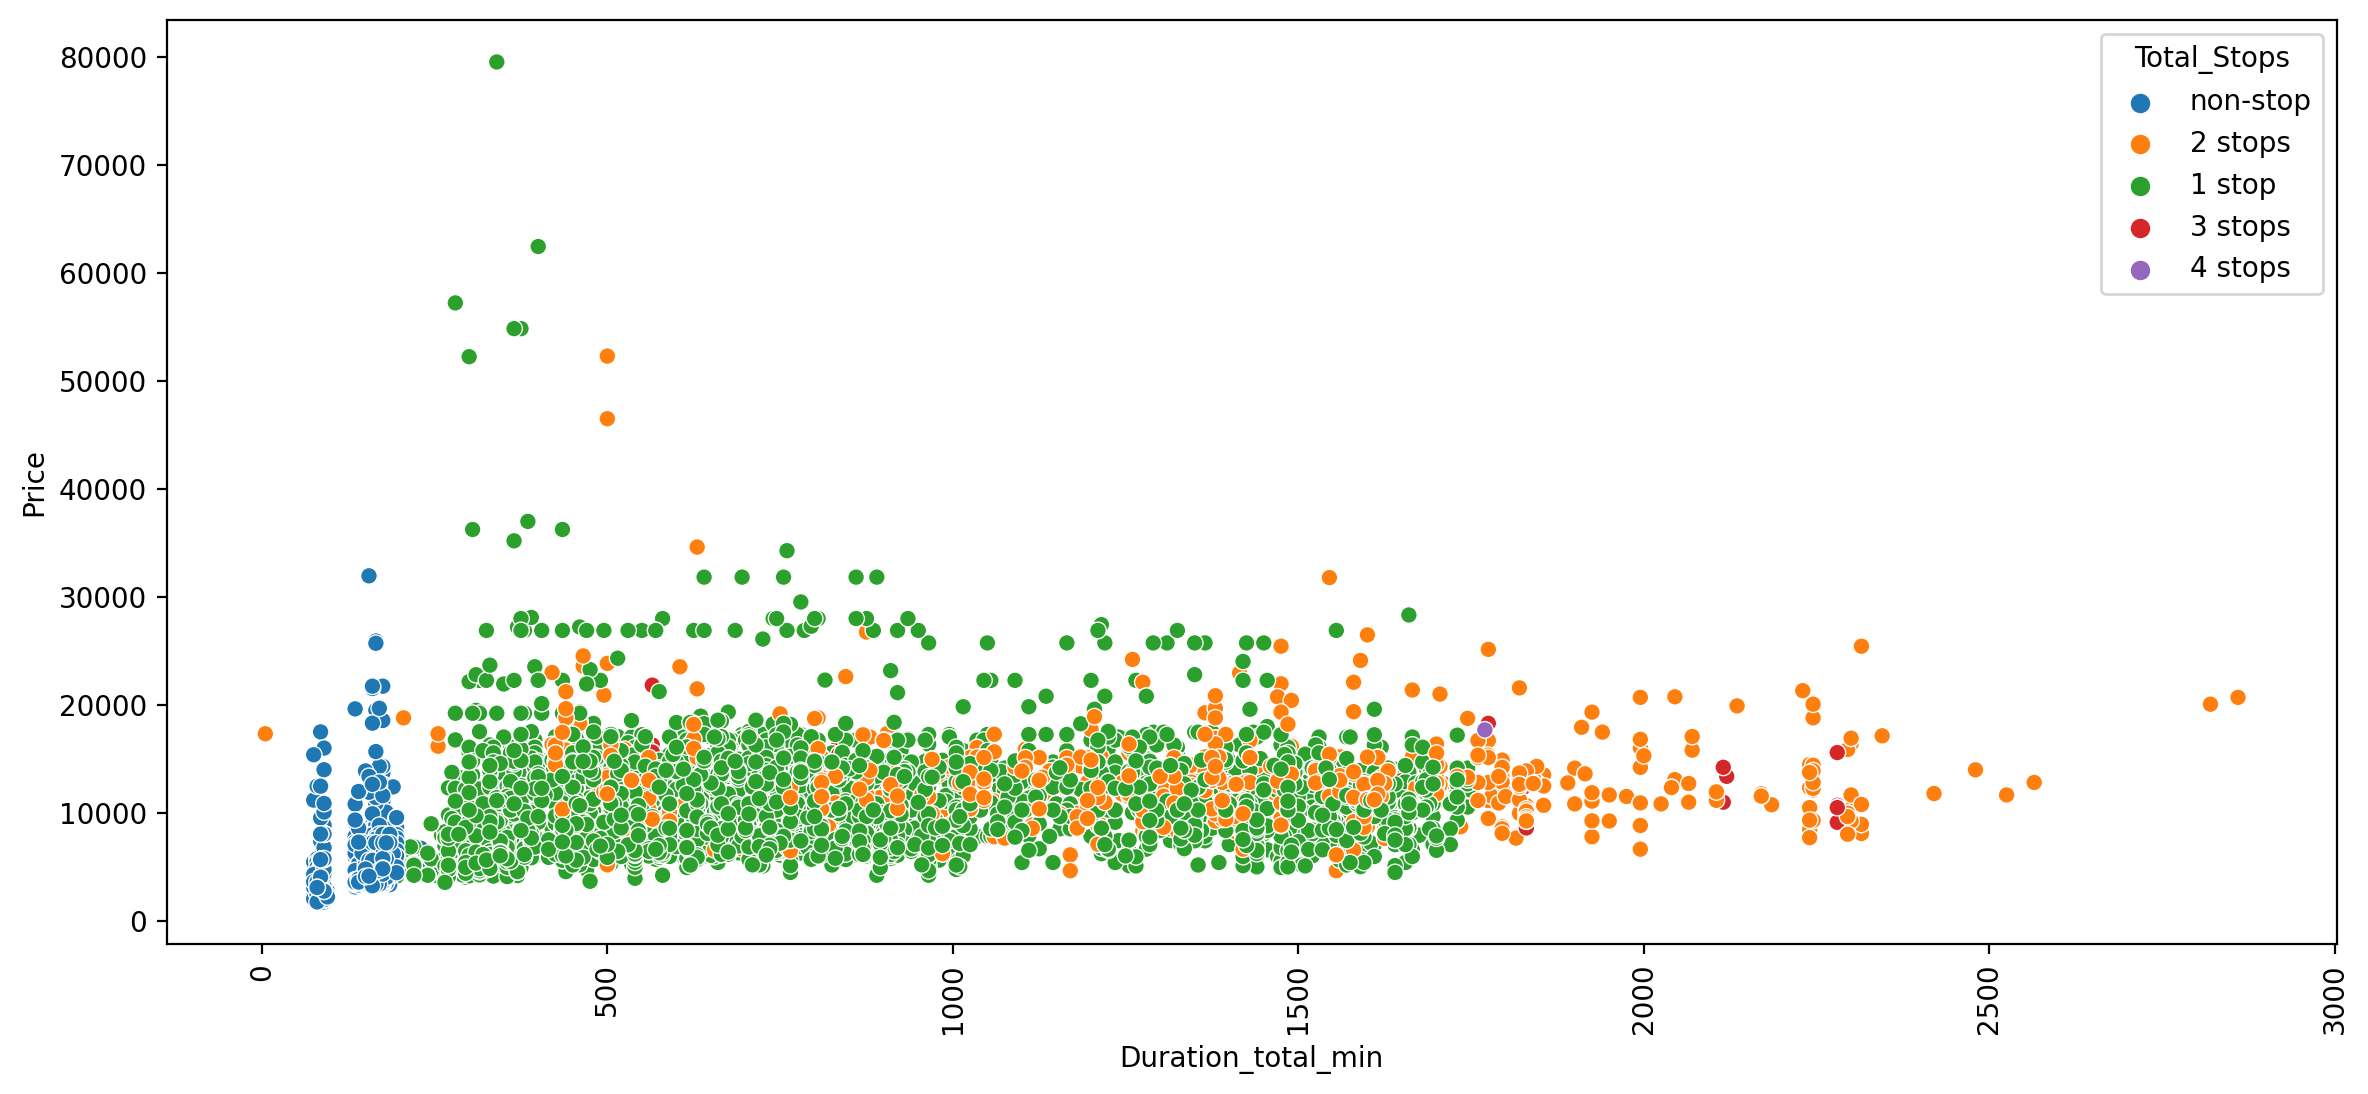

In [262]:
#Analyzing the total duration time will impact the price.
plt.figure(figsize=(14,6),dpi=200)
sns.scatterplot(x='Duration_total_min',y='Price',data=data,hue='Total_Stops')
plt.xticks(rotation=90);


**Inferences:**
* As the number of stops increases during a flight, both the duration of the journey and the ticket price tend to increase. This relationship is influenced by factors such as layovers, aircraft changes, and route complexities, which can impact travel time and cost.

In [263]:
data['Airline'].value_counts()

Airline
Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: count, dtype: int64

<Axes: xlabel='Route'>

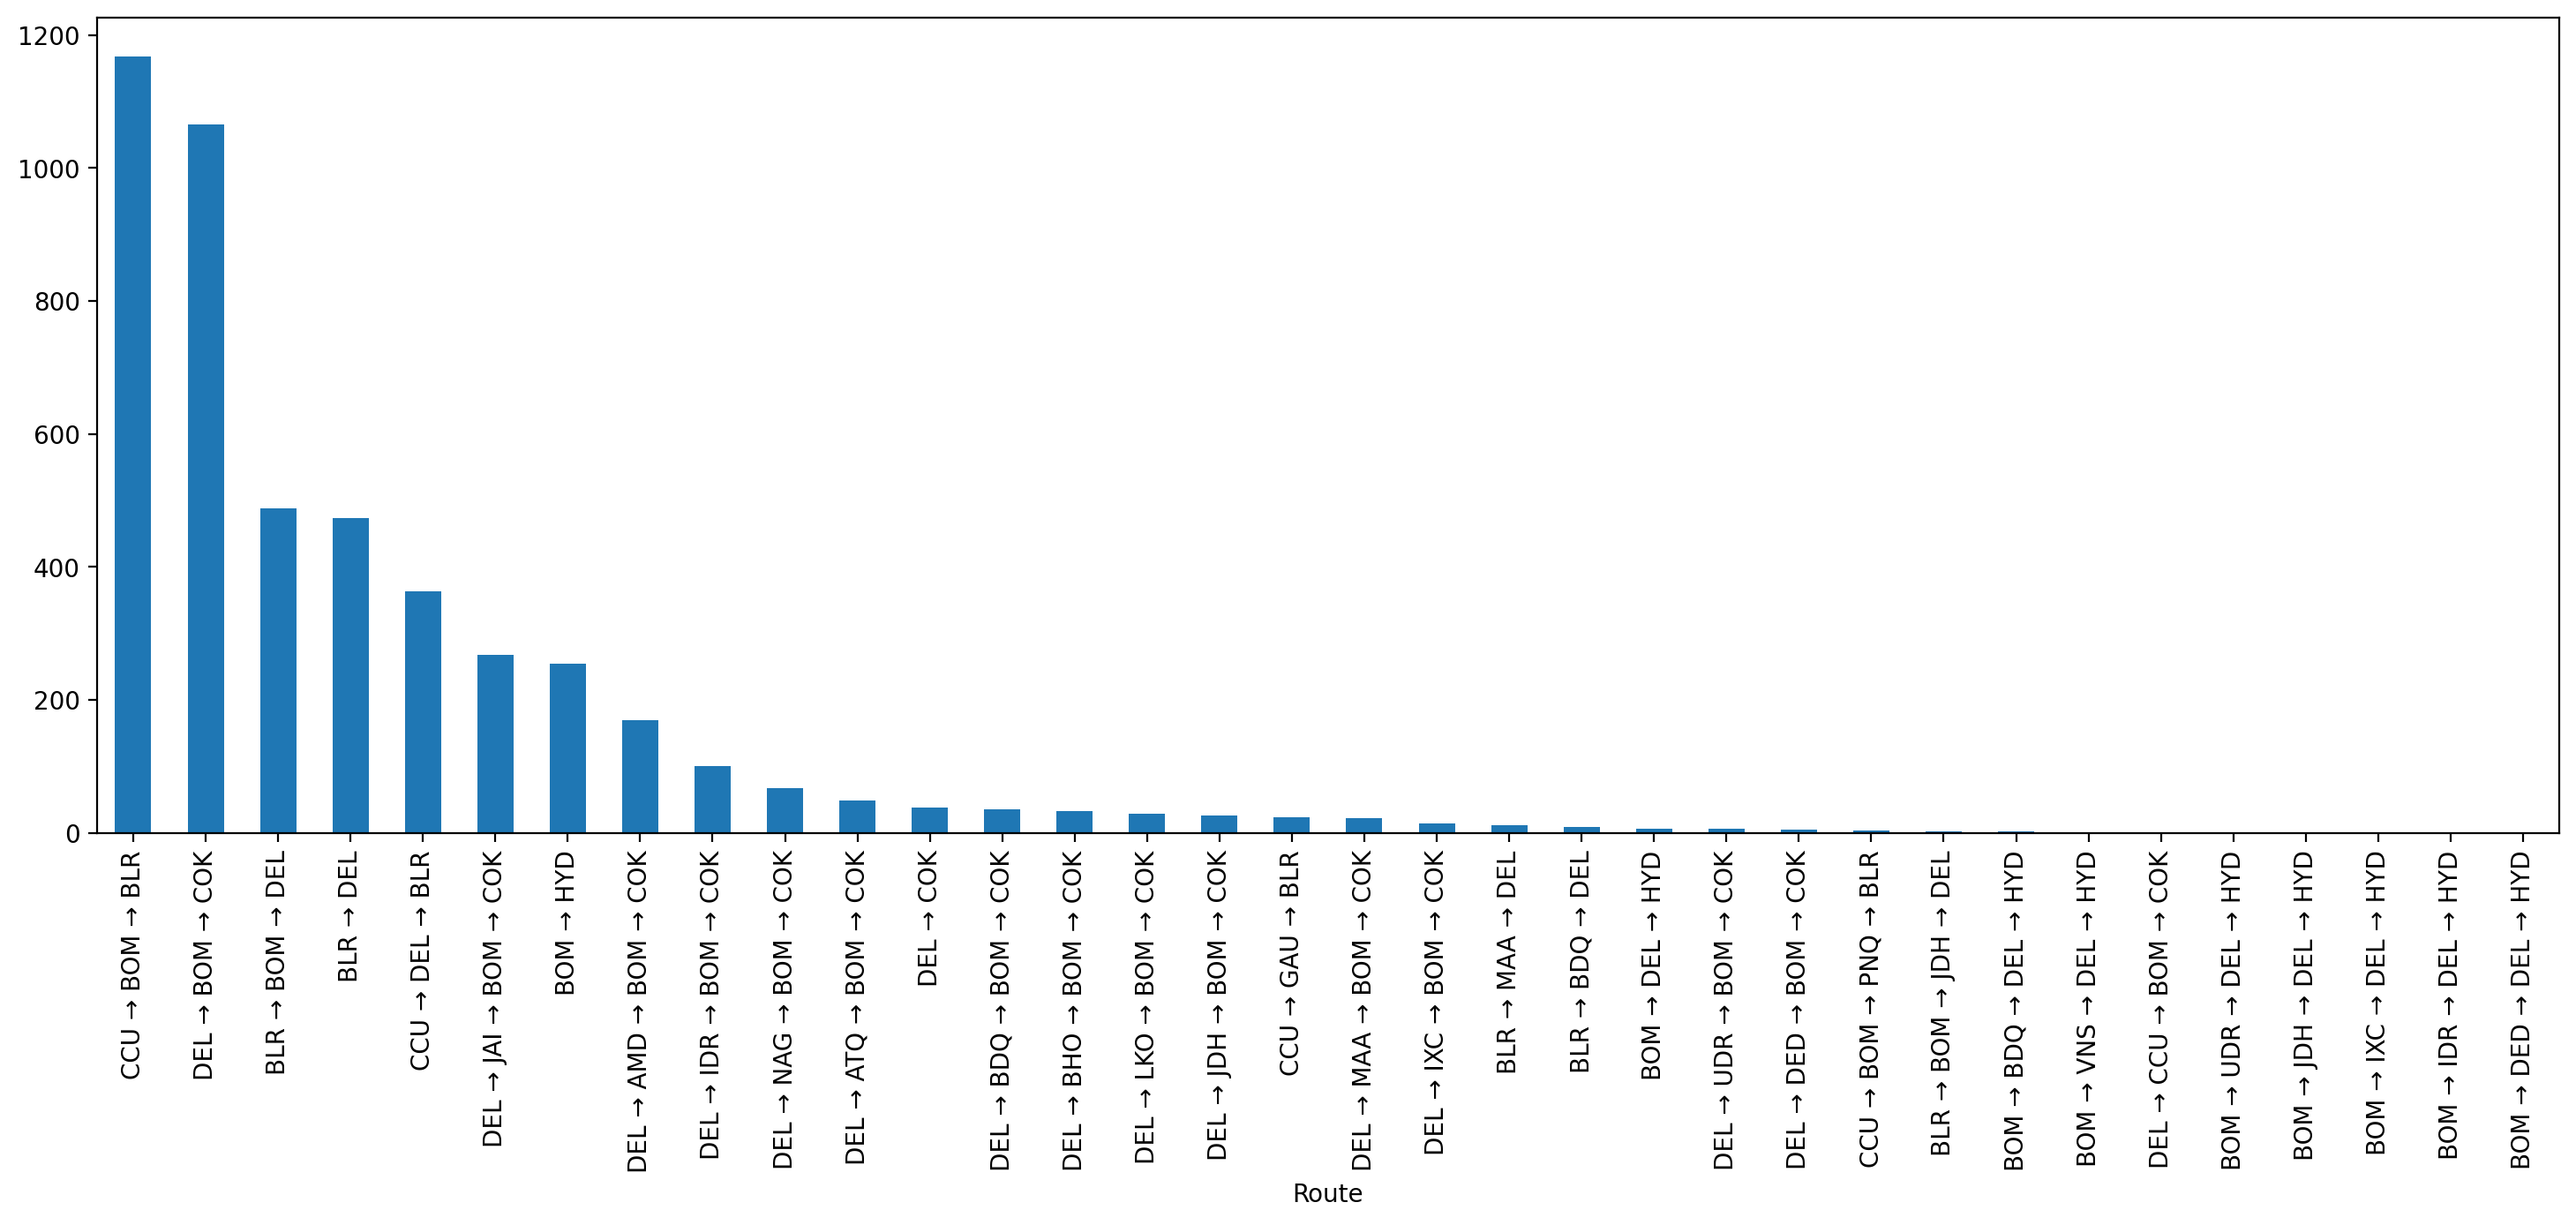

In [264]:
plt.figure(figsize=(18,6),dpi=200)
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False).plot(kind='bar')
#Analyzing the routes where Jet Airways is most traveled.

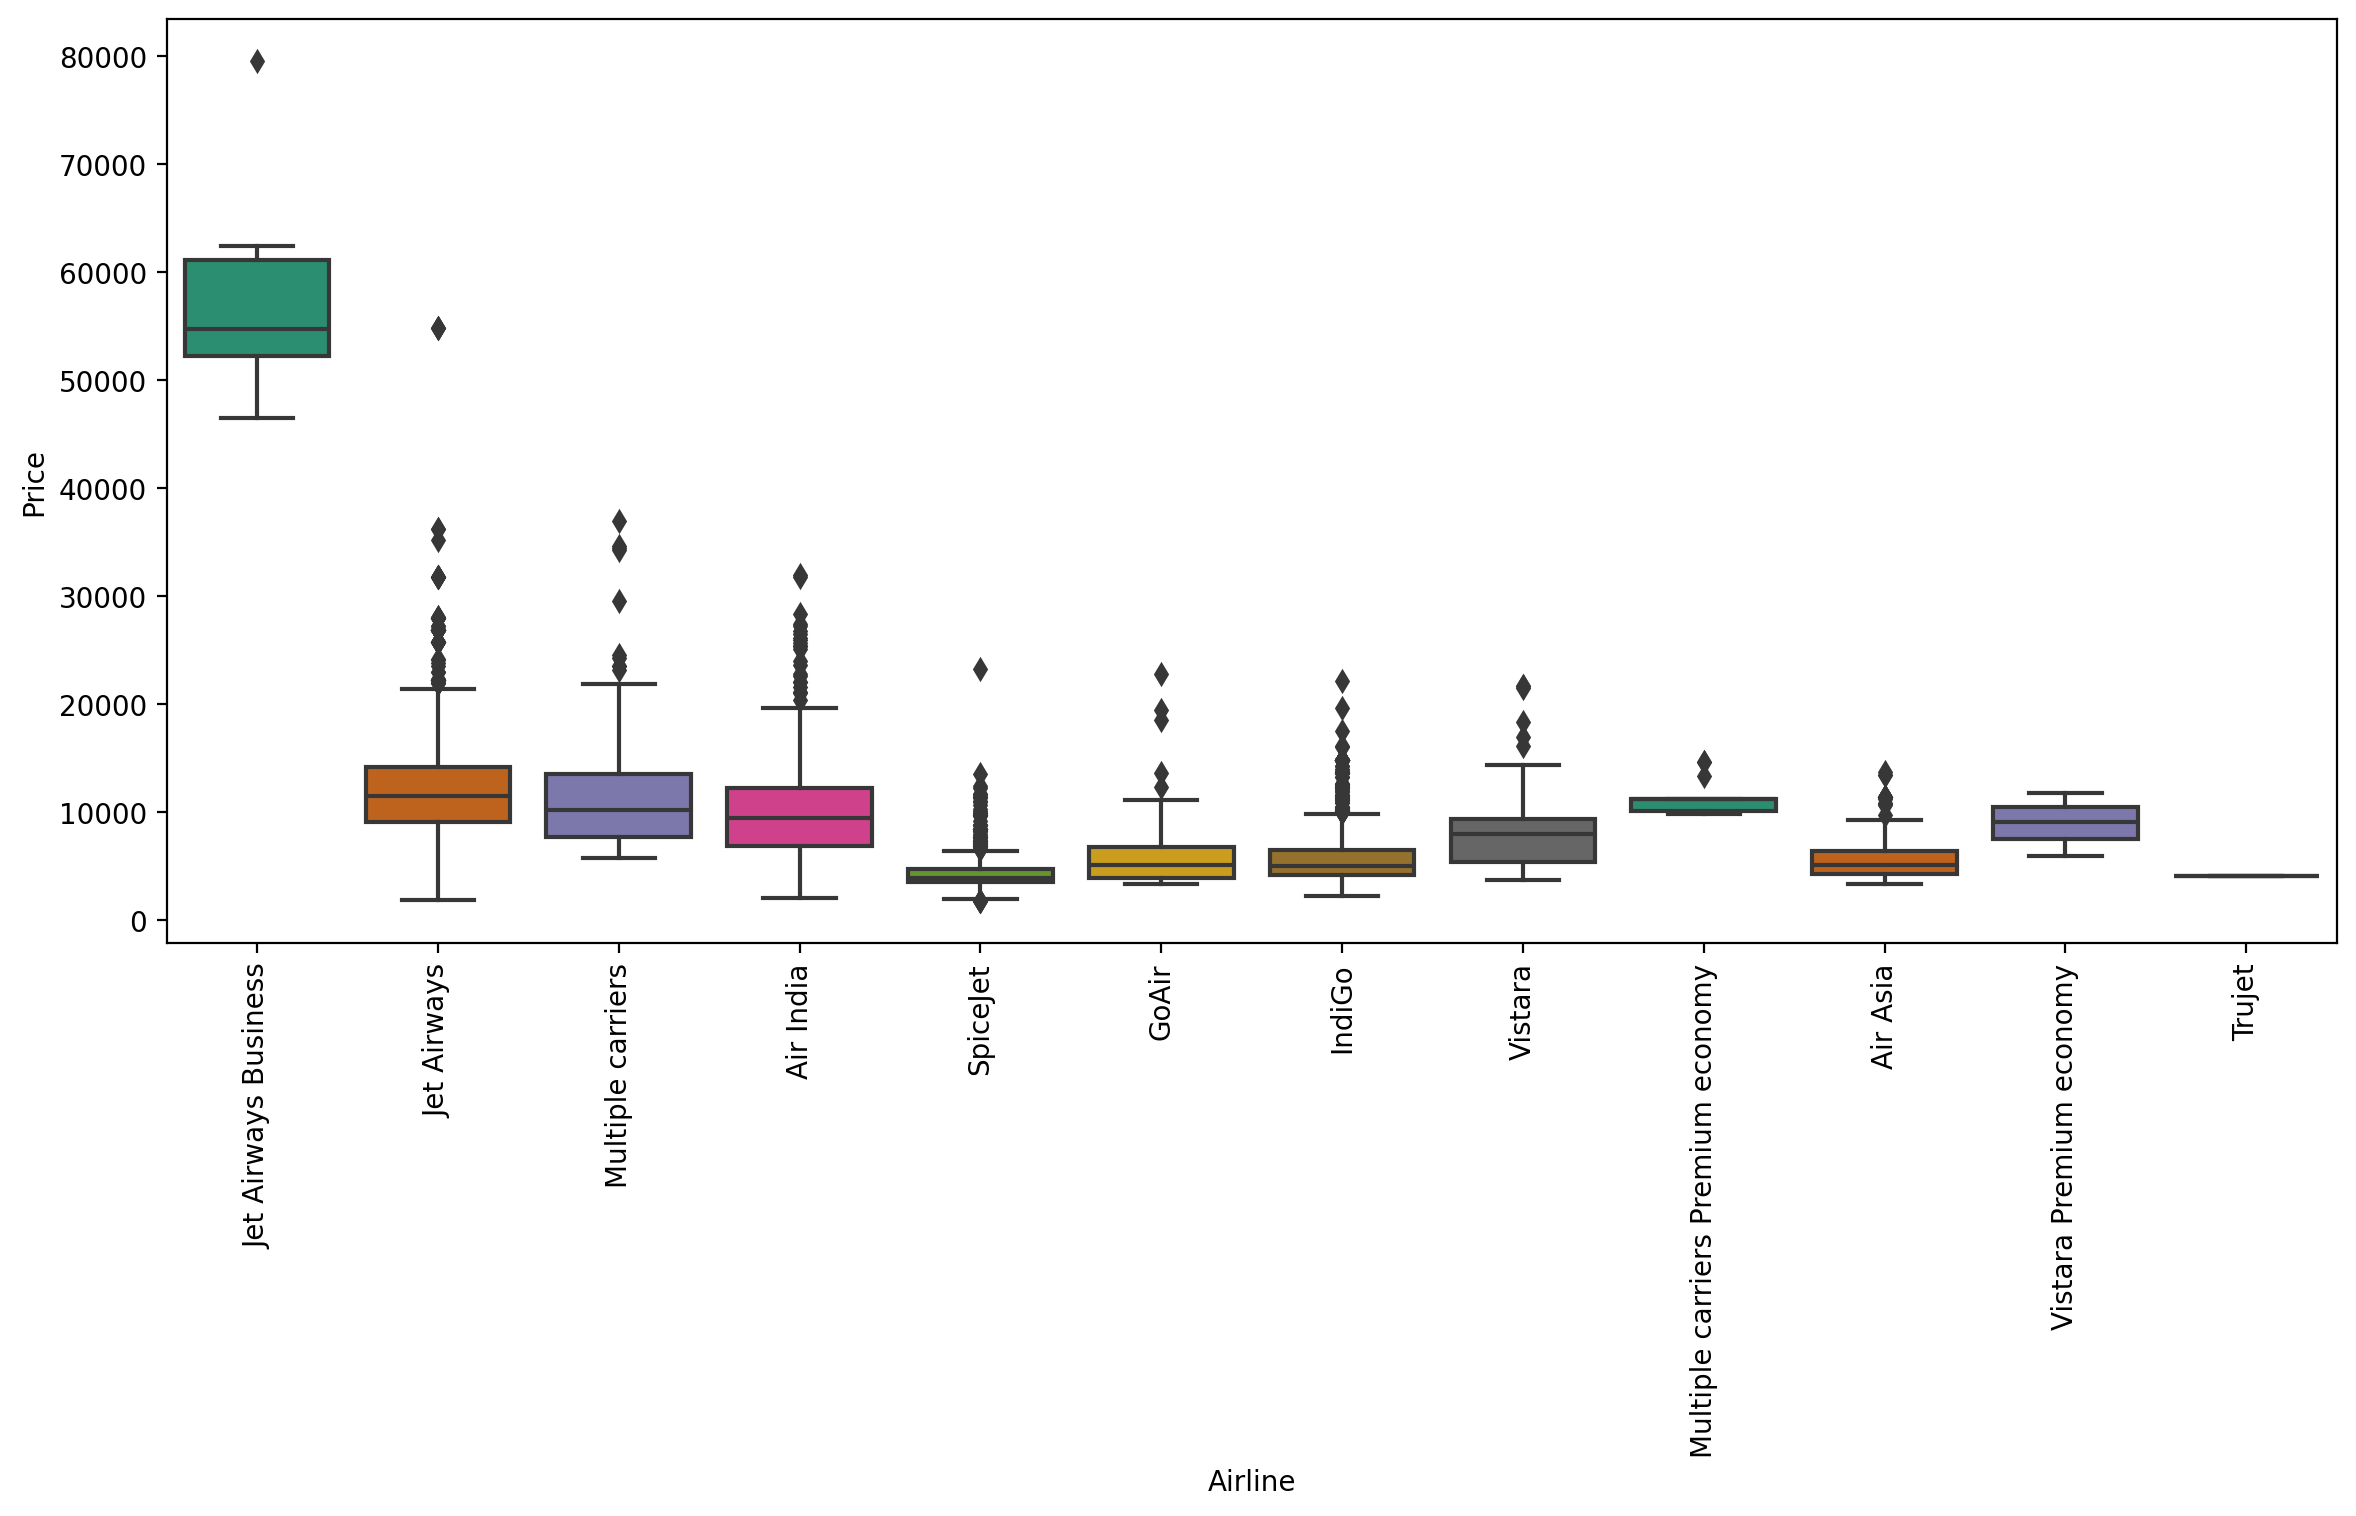

In [265]:
plt.figure(figsize=(14,6),dpi=200)
sns.boxplot(x='Airline',y='Price',data=data.sort_values('Price',ascending=False), palette='Dark2')
plt.xticks(rotation=90);

**Inference:**
* The barplot indicates that Jet Airways' business class flights are consistently more expensive than others. During certain seasons or periods, their prices can spike significantly, likely due to increased demand, limited availability, or specific events influencing travel patterns and pricing dynamics.

In [266]:
print("\n columns with object data type are:-\n")
category_col=[col for col in data.columns if data[col].dtype=='object']
print(category_col)
print("*"*90)


print("\n columns with int data type are:-\n")
numeric_col=[col for col in data.columns if data[col].dtype!='object']
print(numeric_col)
print("*"*90)



 columns with object data type are:-

['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Additional_Info']
******************************************************************************************

 columns with int data type are:-

['Price', 'Journey_day', 'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours', 'Duration_minutes', 'Duration_total_min']
******************************************************************************************


In [267]:
print(data["Source"].unique())
print("*"*90)
#one hot encoding
for sub_category in data['Source'].unique():
    data['Source_'+sub_category] = data['Source'].apply(lambda x: 1 if x == sub_category else 0)
data.head()

['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
******************************************************************************************


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,...,1,10,2,50,170,1,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882.0,9,6,...,4,25,19,0,1140,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,...,23,30,5,25,325,0,1,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,...,21,35,4,45,285,1,0,0,0,0


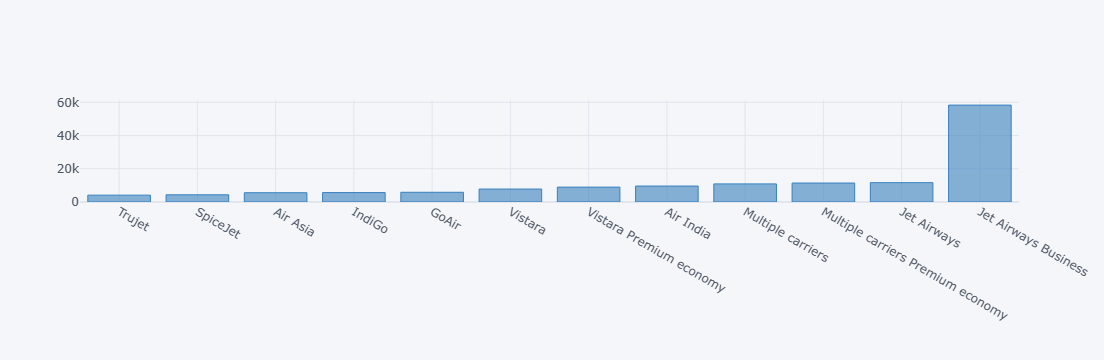

In [268]:
data.groupby(['Airline'])['Price'].mean().sort_values().iplot(kind='bar',color='blue')

In [269]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9611.210616
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [270]:
#performing target guided mean encoding on data
airlines=data.groupby(['Airline'])['Price'].mean().sort_values().index
print(airlines)
print("*"*90)

#manual encoding or label encoding on data
dict_airlines={key:index for index,key in enumerate(airlines,0)}
data['Airline']=data['Airline'].map(dict_airlines)
data.head()

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')
******************************************************************************************


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,...,1,10,2,50,170,1,0,0,0,0
1,7,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,...,13,15,7,25,445,0,1,0,0,0
2,10,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882.0,9,6,...,4,25,19,0,1140,0,0,1,0,0
3,3,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,...,23,30,5,25,325,0,1,0,0,0
4,3,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,...,21,35,4,45,285,1,0,0,0,0


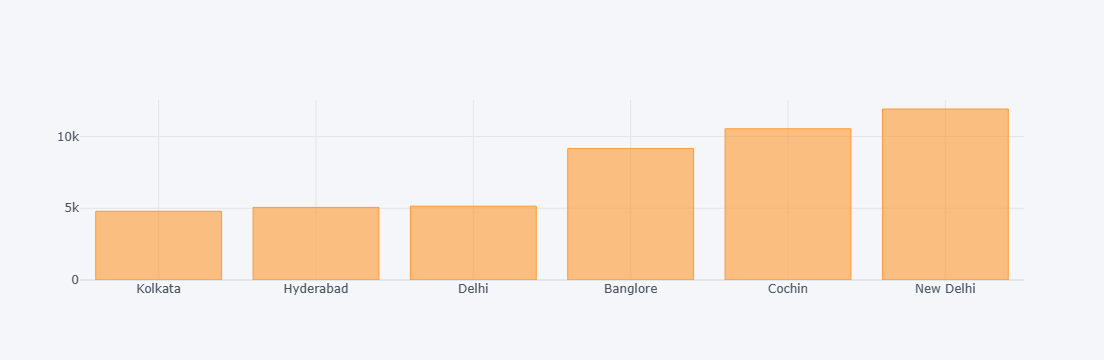

In [271]:
data.groupby(['Destination'])['Price'].mean().sort_values().iplot(kind='bar')

In [272]:
dest=data.groupby(['Destination'])['Price'].mean().sort_values().index
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin', 'New Delhi'], dtype='object', name='Destination')

In [273]:
print(data['Destination'].unique())
print("*"*90)

#replacing new Delhi by Delhi
data['Destination'].replace('New Delhi','Delhi',inplace=True)

print(data['Destination'].unique())
print("*"*90)

#perform label encoding
dict_dest={key:index for index,key in enumerate(dest,0)}
print(dict_dest)

data['Destination']=data['Destination'].map(dict_dest)
print("*"*90)

data.head()



['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
******************************************************************************************
['Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Hyderabad']
******************************************************************************************
{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4, 'New Delhi': 5}
******************************************************************************************


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,...,1,10,2,50,170,1,0,0,0,0
1,7,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,...,13,15,7,25,445,0,1,0,0,0
2,10,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882.0,9,6,...,4,25,19,0,1140,0,0,1,0,0
3,3,Kolkata,3,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,...,23,30,5,25,325,0,1,0,0,0
4,3,Banglore,2,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,...,21,35,4,45,285,1,0,0,0,0


In [274]:
print(data['Total_Stops'].value_counts())
print("*"*90)

print(data['Total_Stops'].unique())
print("*"*90)

#performing label encoding on Total Stops
stop={'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4}
data['Total_Stops']=data['Total_Stops'].map(stop)
data.head()

Total_Stops
1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: count, dtype: int64
******************************************************************************************
['non-stop' '2 stops' '1 stop' '3 stops' nan '4 stops']
******************************************************************************************


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,...,1,10,2,50,170,1,0,0,0,0
1,7,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,...,13,15,7,25,445,0,1,0,0,0
2,10,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2.0,No info,13882.0,9,6,...,4,25,19,0,1140,0,0,1,0,0
3,3,Kolkata,3,CCU → NAG → BLR,5h 25m,1.0,No info,6218.0,12,5,...,23,30,5,25,325,0,1,0,0,0
4,3,Banglore,2,BLR → NAG → DEL,4h 45m,1.0,No info,13302.0,1,3,...,21,35,4,45,285,1,0,0,0,0


In [275]:
#droping the columns
data.drop(columns=['Additional_Info','Duration_total_min','Source','Journey_year','Route','Duration'],axis=1,inplace=True)

In [276]:
data.head()

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0.0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2.0,7662.0,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2.0,13882.0,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1.0,6218.0,12,5,18,5,23,30,5,25,0,1,0,0,0
4,3,2,1.0,13302.0,1,3,16,50,21,35,4,45,1,0,0,0,0


In [277]:
print("\nFeatures\columns:\n {}".format(data.columns))
print("*"*90)
print("\n\nNo of Rows: {}".format(data.shape[1]))
print("*"*90)
print("\n\nData Type: \n {}".format(data.dtypes))
print("*"*90)
print("\nContains nan values in the cells: {}\n".format(data.isna().values.any()))
print("*"*90)
print("\nTotal Empty cells by columns :\n{}".format(data.isna().sum()),"\n\n")
print("*"*90)


Features\columns:
 Index(['Airline', 'Destination', 'Total_Stops', 'Price', 'Journey_day',
       'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_minutes', 'Source_Banglore', 'Source_Kolkata', 'Source_Delhi',
       'Source_Chennai', 'Source_Mumbai'],
      dtype='object')
******************************************************************************************


No of Rows: 17
******************************************************************************************


Data Type: 
 Airline                  int64
Destination              int64
Total_Stops            float64
Price                  float64
Journey_day              int32
Journey_month            int32
Dep_Time_hour            int32
Dep_Time_minute          int32
Arrival_Time_hour        int32
Arrival_Time_minute      int32
Duration_hours           int64
Duration_minutes         int64
Source_Banglore          int64
Source_Kolkata   

In [278]:
#missing values
data[data['Total_Stops'].isnull()]

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
9039,7,4,NaN,7480.0,6,5,9,45,9,25,23,40,0,0,1,0,0


In [279]:
print(data['Total_Stops'].mode()[0])
print("*"*90)
data['Total_Stops']=data['Total_Stops'].fillna(data['Total_Stops'].mode()[0])
data.head()

1.0
******************************************************************************************


,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0.0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2.0,7662.0,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2.0,13882.0,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1.0,6218.0,12,5,18,5,23,30,5,25,0,1,0,0,0
4,3,2,1.0,13302.0,1,3,16,50,21,35,4,45,1,0,0,0,0


In [280]:
data[data['Price'].isnull()]

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,10,4,1.0,NaN,6,6,17,30,4,25,10,55,0,0,1,0,0
1,3,3,1.0,NaN,12,5,6,20,10,20,4,0,0,1,0,0,0
2,10,4,1.0,NaN,21,5,19,15,19,0,23,45,0,0,1,0,0
3,8,4,1.0,NaN,21,5,8,0,21,0,13,0,0,0,1,0,0
4,2,2,0.0,NaN,24,6,23,55,2,45,2,50,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,7,3,1.0,NaN,6,6,20,30,20,25,23,55,0,1,0,0,0
2667,3,3,0.0,NaN,27,3,14,20,16,55,2,35,0,1,0,0,0
2668,10,4,1.0,NaN,6,3,21,50,4,25,6,35,0,0,1,0,0
2669,7,4,1.0,NaN,6,3,4,0,19,15,15,15,0,0,1,0,0


In [281]:
print(data['Price'].mode()[0])
print("*"*90)
data['Price']=data['Price'].fillna(data['Price'].mode()[0])
data.head()

10262.0
******************************************************************************************


,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0.0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2.0,7662.0,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2.0,13882.0,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1.0,6218.0,12,5,18,5,23,30,5,25,0,1,0,0,0
4,3,2,1.0,13302.0,1,3,16,50,21,35,4,45,1,0,0,0,0


In [282]:
#outliers Detection
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    
    sns.distplot(df[col],ax=ax2,kde=False)



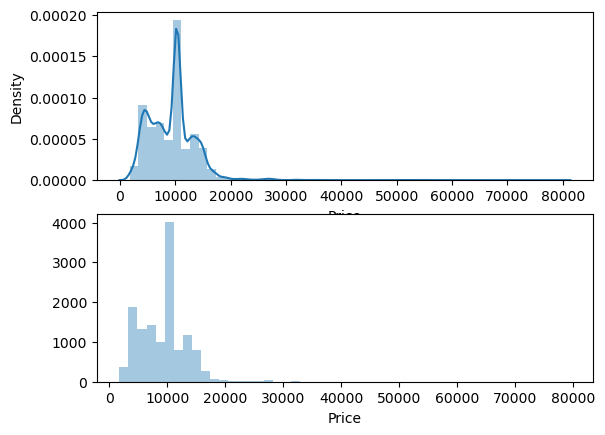

In [283]:
plot(data,'Price')

<Axes: xlabel='Price'>

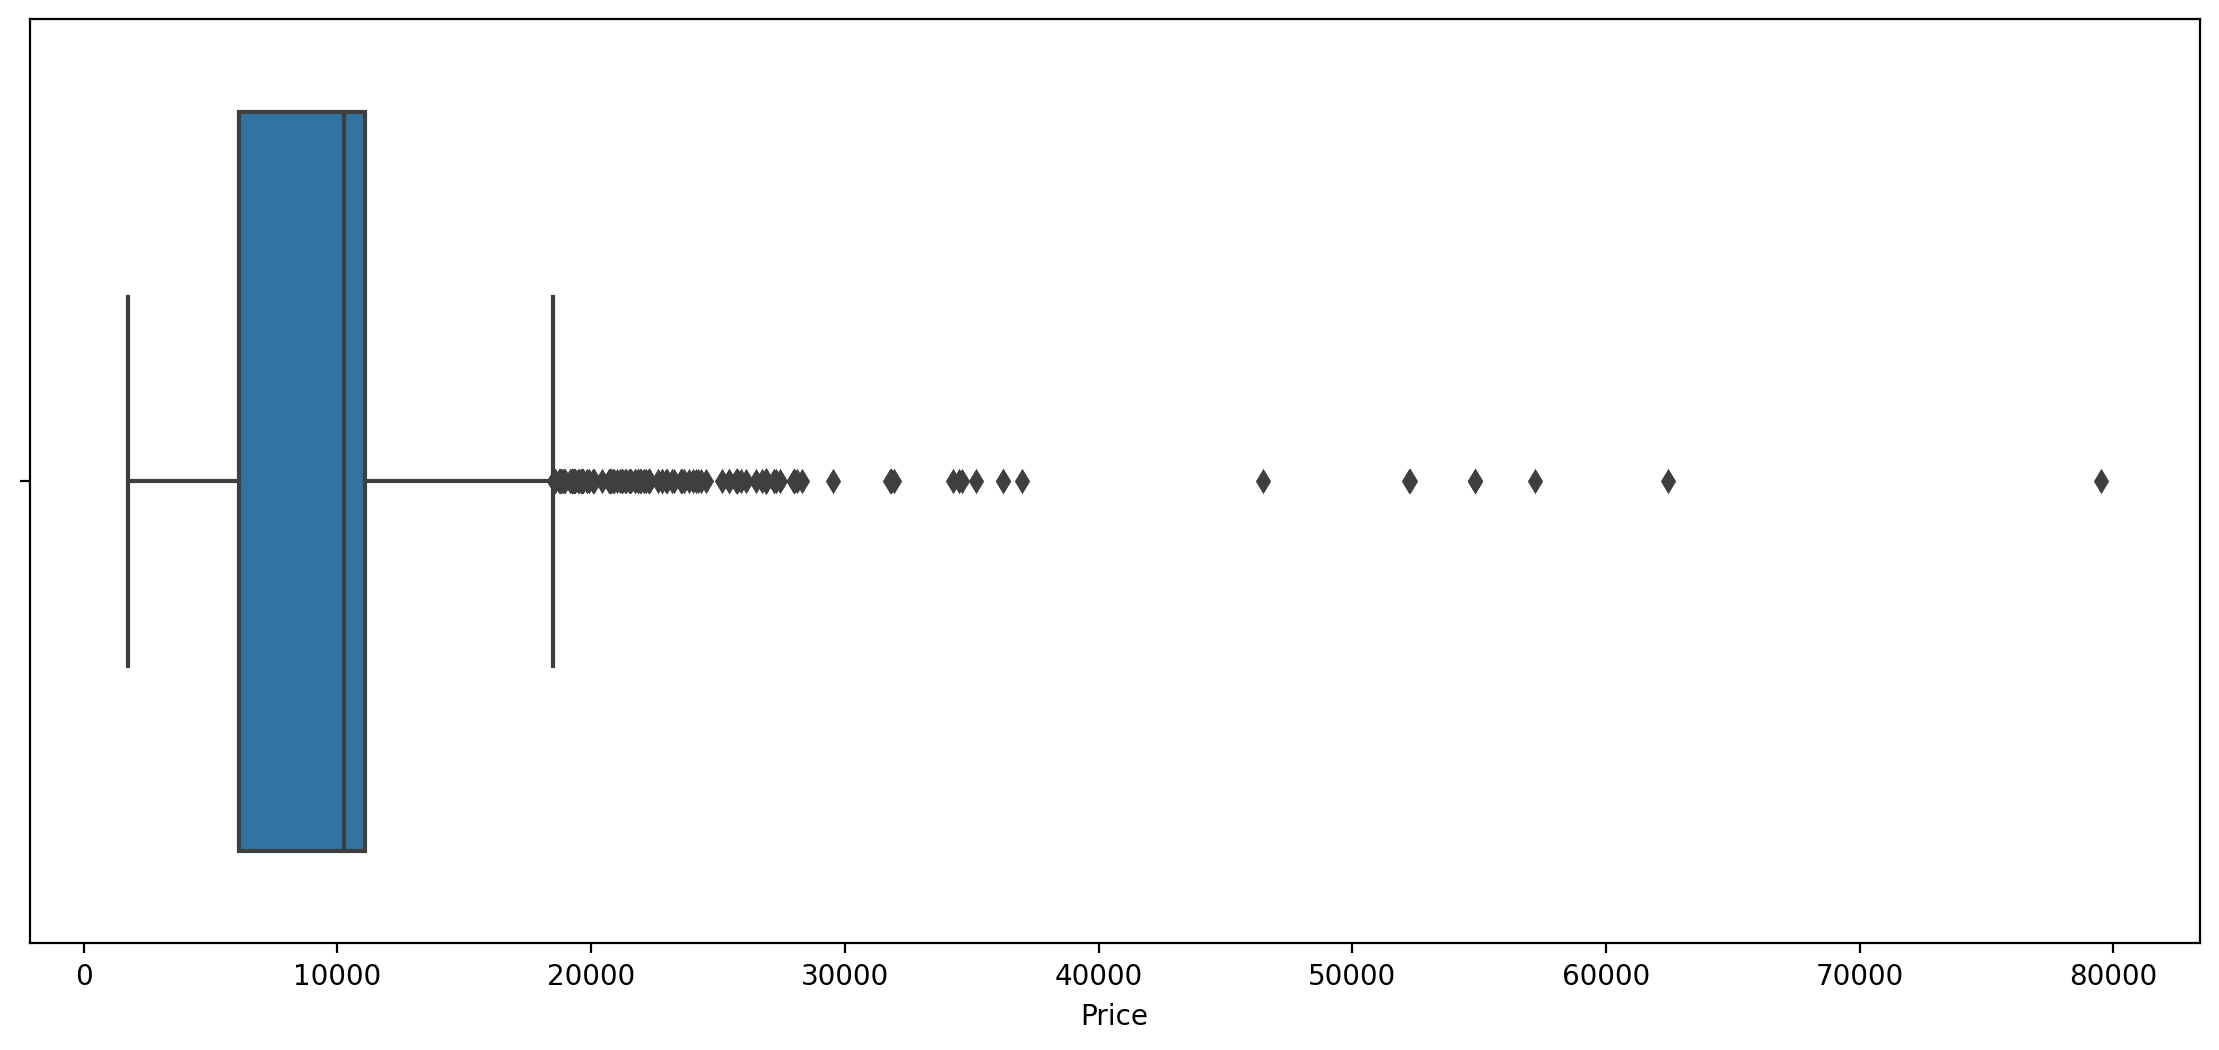

In [284]:
plt.figure(figsize=(14,6),dpi=200)
sns.boxplot(x='Price',data=data)

In [285]:
#handing missing values
q1=data['Price'].quantile(0.25)
q3=data['Price'].quantile(0.75)

iqr=q3-q1
maximum=q3+1.5*iqr
minimum=q1-1.5*iqr
print("The IQR values is:",iqr)
print("The maximum value of price is:",maximum)
print("The minimum value of price is:",minimum)

The IQR values is: 4951.75
The maximum value of price is: 18514.625
The minimum value of price is: -1292.375


In [286]:
print([price for price in data['Price'] if price>maximum or price<minimum]) 

[22270.0, 19495.0, 19225.0, 27430.0, 18799.0, 19630.0, 18804.0, 36983.0, 26890.0, 26890.0, 22096.0, 19828.0, 25139.0, 27210.0, 19225.0, 52229.0, 26743.0, 26890.0, 19907.0, 25735.0, 27992.0, 26890.0, 26890.0, 20064.0, 20800.0, 21219.0, 23583.0, 26890.0, 18804.0, 23533.0, 20999.0, 24115.0, 25735.0, 54826.0, 18804.0, 31783.0, 27992.0, 19329.0, 19332.0, 26890.0, 22619.0, 21954.0, 26890.0, 19225.0, 25430.0, 36235.0, 27210.0, 22270.0, 22270.0, 26890.0, 25735.0, 19595.0, 22270.0, 54826.0, 19508.0, 21829.0, 26890.0, 22096.0, 35185.0, 19225.0, 20120.0, 18959.0, 79512.0, 28097.0, 27992.0, 19225.0, 26890.0, 21375.0, 21829.0, 21219.0, 25735.0, 26092.0, 19372.0, 31825.0, 20904.0, 20747.0, 19828.0, 25913.0, 21226.0, 20694.0, 21130.0, 18804.0, 19225.0, 25735.0, 19595.0, 20416.0, 22950.0, 22270.0, 27992.0, 19266.0, 18550.0, 31825.0, 20800.0, 23267.0, 21730.0, 22270.0, 62427.0, 18558.0, 54826.0, 22270.0, 18581.0, 31825.0, 25430.0, 26890.0, 36235.0, 18916.0, 23843.0, 26890.0, 19225.0, 22153.0, 25735.0, 

**This are the outliers in the Price columns** 

In [287]:
#replacing the outliers value by median
data['Price']=np.where(data['Price']>35000,data['Price'].median(),data['Price'])

<Axes: xlabel='Price'>

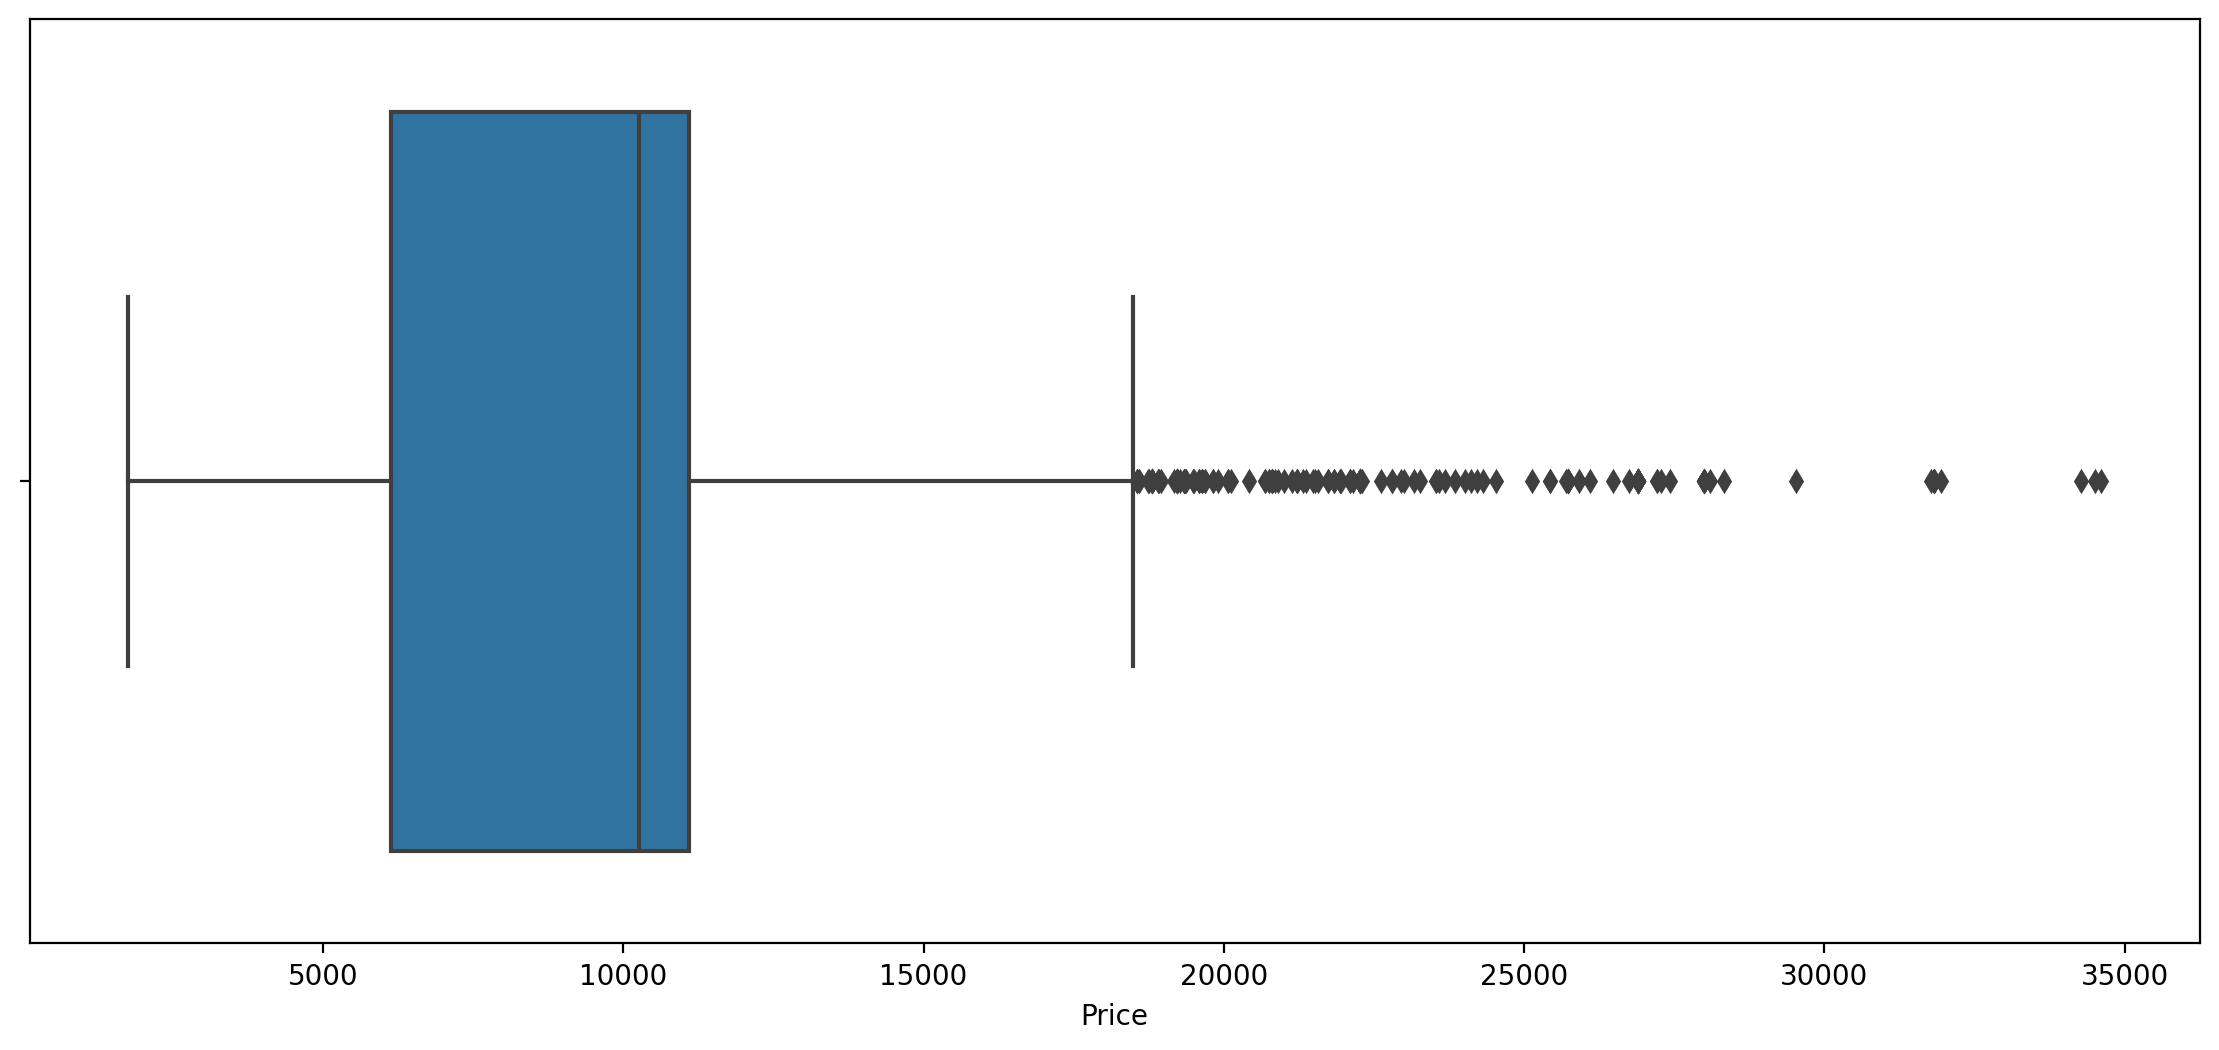

In [288]:
plt.figure(figsize=(14,6),dpi=200)
sns.boxplot(x='Price',data=data)

<Axes: >

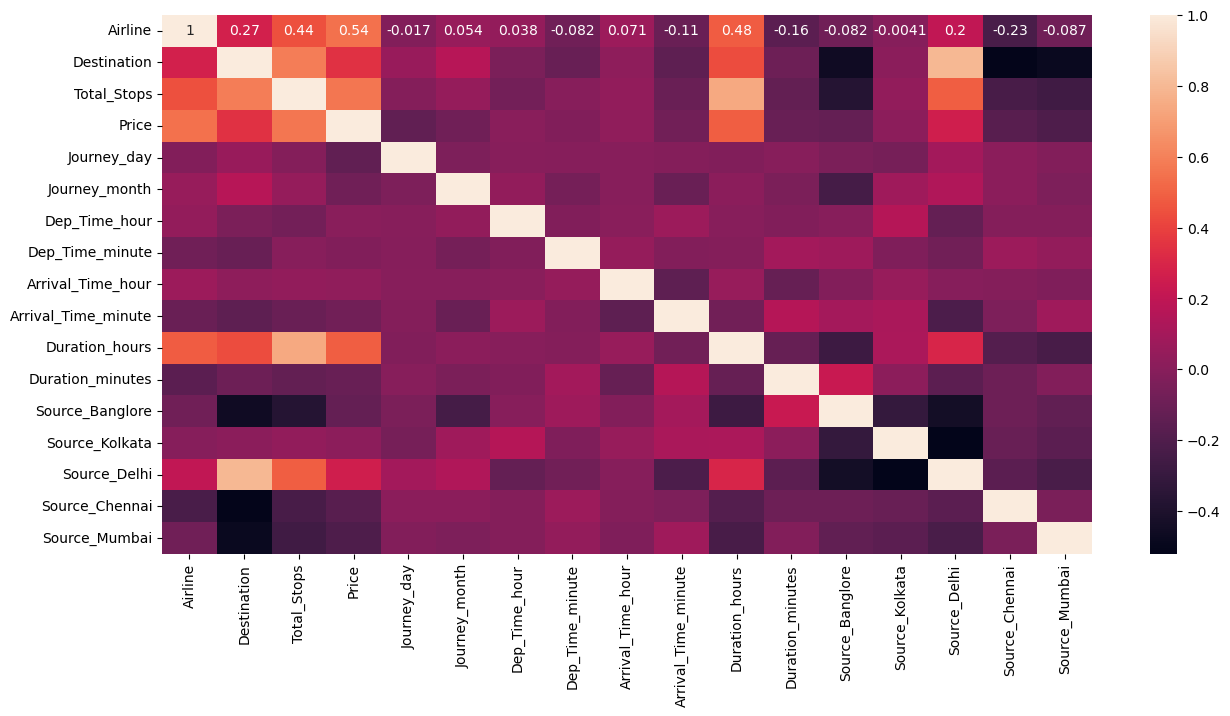

In [289]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)

In [290]:
scaler=MinMaxScaler()
scaled_X=scaler.fit_transform(data)

In [291]:
scaler=pd.DataFrame(scaled_X,columns=data.columns)
scaler

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,0.272727,0.50,0.00,0.065086,0.884615,0.000000,0.956522,0.363636,0.043478,0.181818,0.042553,0.909091,1.0,0.0,0.0,0.0,0.0
1,0.636364,0.75,0.50,0.179701,0.000000,0.666667,0.217391,0.909091,0.565217,0.272727,0.148936,0.454545,0.0,1.0,0.0,0.0,0.0
2,0.909091,1.00,0.50,0.369052,0.307692,1.000000,0.391304,0.454545,0.173913,0.454545,0.404255,0.000000,0.0,0.0,1.0,0.0,0.0
3,0.272727,0.75,0.25,0.135742,0.423077,0.666667,0.782609,0.090909,1.000000,0.545455,0.106383,0.454545,0.0,1.0,0.0,0.0,0.0
4,0.272727,0.50,0.25,0.351396,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,0.085106,0.818182,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,0.636364,0.75,0.25,0.258851,0.192308,1.000000,0.869565,0.545455,0.869565,0.454545,0.489362,1.000000,0.0,1.0,0.0,0.0,0.0
13350,0.272727,0.75,0.00,0.258851,1.000000,0.000000,0.608696,0.363636,0.695652,1.000000,0.042553,0.636364,0.0,1.0,0.0,0.0,0.0
13351,0.909091,1.00,0.25,0.258851,0.192308,0.000000,0.913043,0.909091,0.173913,0.454545,0.127660,0.636364,0.0,0.0,1.0,0.0,0.0
13352,0.636364,1.00,0.25,0.258851,0.192308,0.000000,0.173913,0.000000,0.826087,0.272727,0.319149,0.272727,0.0,0.0,1.0,0.0,0.0


In [292]:
# Perform feature selection
#indenpendent features
X=scaler.drop('Price',axis=1)
X.head()

,Airline,Destination,Total_Stops,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,0.272727,0.50,0.00,0.884615,0.000000,0.956522,0.363636,0.043478,0.181818,0.042553,0.909091,1.0,0.0,0.0,0.0,0.0
1,0.636364,0.75,0.50,0.000000,0.666667,0.217391,0.909091,0.565217,0.272727,0.148936,0.454545,0.0,1.0,0.0,0.0,0.0
2,0.909091,1.00,0.50,0.307692,1.000000,0.391304,0.454545,0.173913,0.454545,0.404255,0.000000,0.0,0.0,1.0,0.0,0.0
3,0.272727,0.75,0.25,0.423077,0.666667,0.782609,0.090909,1.000000,0.545455,0.106383,0.454545,0.0,1.0,0.0,0.0,0.0
4,0.272727,0.50,0.25,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,0.085106,0.818182,1.0,0.0,0.0,0.0,0.0


In [293]:
#dependent features
y=scaler['Price']
y


0        0.065086
1        0.179701
2        0.369052
3        0.135742
4        0.351396
           ...   
13349    0.258851
13350    0.258851
13351    0.258851
13352    0.258851
13353    0.258851
Name: Price, Length: 13354, dtype: float64

In [294]:
from sklearn.feature_selection import mutual_info_regression
mutual_data=mutual_info_regression(X,y)
print(mutual_data)
print("*"*90)


imp_data=pd.DataFrame(mutual_data,index=X.columns)
imp_data.columns=['Importance_features']

imp_data.sort_values(by='Importance_features',ascending=False)


[1.04907656 0.83709185 0.61461776 0.29552723 0.48513147 0.73957406
 0.59562502 0.8956759  0.71025233 0.87413358 0.5407194  0.30816092
 0.36900219 0.3993389  0.1054549  0.15554742]
******************************************************************************************


,Importance_features
Airline,1.049077
Arrival_Time_hour,0.895676
Duration_hours,0.874134
Destination,0.837092
Dep_Time_hour,0.739574
Arrival_Time_minute,0.710252
Total_Stops,0.614618
Dep_Time_minute,0.595625
Duration_minutes,0.540719
Journey_month,0.485131


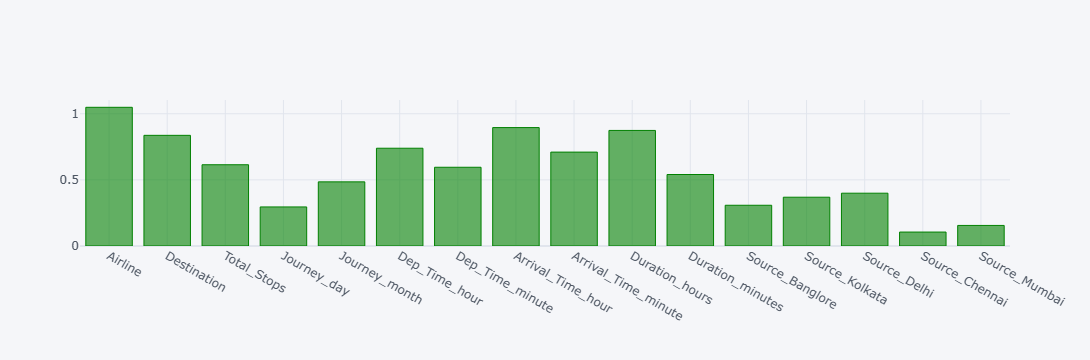

In [295]:
imp_data.iplot(kind='bar',colors='green')

In [296]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print('The shapes of X_train = {0}, y_train = {1}, X_test = {2},y_test = {3}'.format(X_train.shape,
                                                                                     y_train.shape,
                                                                                     X_test.shape,
                                                                                     y_test.shape))

The shapes of X_train = (10015, 16), y_train = (10015,), X_test = (3339, 16),y_test = (3339,)


In [297]:
def shape(train,test):
        print("The shape of {} is  {} {}".format("train,test",train.shape,test.shape))

In [298]:
shape(X_train,X_test)

The shape of train,test is  (10015, 16) (3339, 16)


In [299]:
model=RandomForestRegressor()
model.fit(X_train,y_train)
y_predicition=model.predict(X_test)
print(y_predicition)

[0.12552914 0.40219915 0.15679716 ... 0.21093317 0.1492706  0.24632926]


In [300]:
r2_score=metrics.r2_score(y_test,y_predicition)
print('r2_score is : {}'.format(r2_score))
print('MAE is : {}'.format(mean_absolute_error(y_test,y_predicition)))
print('MSE is : {}'.format(mean_squared_error(y_test,y_predicition)))
print('RMSE is : {}'.format(np.sqrt(mean_squared_error(y_test,y_predicition))))

r2_score is : 0.552628772758802
MAE is : 0.05894086218269663
MSE is : 0.006486816343777772
RMSE is : 0.08054077441754438


In [301]:
def mape(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [302]:
mape(y_test,y_predicition)

42.6331569639454

In [303]:
def predict(model):
    model1=model.fit(X_train,y_train)
    print('Traning Score : {}'.format(model.score(X_train,y_train)))
    y_pred=model1.predict(X_test)
    print('Predicitions are : {}'.format(y_pred))
    print('\n')
    r2_score = metrics.r2_score(y_test, y_pred)
    print('r2_score is : {}'.format(r2_score))
    print('MAE is : {}'.format(metrics.mean_absolute_error(y_test, y_pred)))
    print('MSE is : {}'.format(metrics.mean_squared_error(y_test, y_pred)))
    print('RMSE is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
    print('MAPE is : {}'.format(mape(y_test, y_pred)))
    sns.distplot(y_test - y_pred)

Traning Score : 0.8997777811090593
Predicitions are : [0.13563579 0.39605513 0.15271272 ... 0.21652422 0.16656824 0.24515328]


r2_score is : 0.5568256439099917
MAE is : 0.058875452717512926
MSE is : 0.006425962335476544
RMSE is : 0.08016210036841939
MAPE is : 42.83665748646245


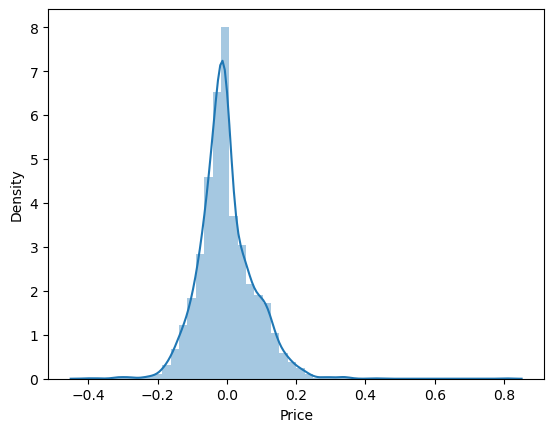

In [304]:
#lets perform model for Random Forest Regressor
predict(RandomForestRegressor())

Traning Score : 0.9392280152393858
Predicitions are : [0.11930348 0.47830984 0.13696003 ... 0.20761667 0.25885111 0.27961277]


r2_score is : 0.3019864546500086
MAE is : 0.06650828907001663
MSE is : 0.010121092726675076
RMSE is : 0.1006036417167643
MAPE is : 46.39546519850995


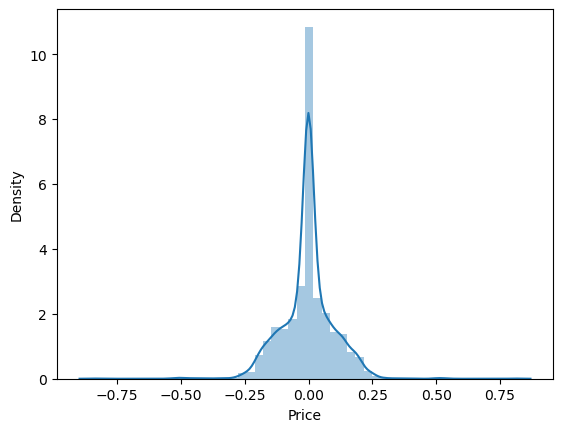

In [305]:
#lets built Decision tree Regressor model
predict(DecisionTreeRegressor())

Traning Score : 0.4677830705665482
Predicitions are : [0.17260742 0.33325195 0.16870117 ... 0.21313477 0.08862305 0.19213867]


r2_score is : 0.4574202283169756
MAE is : 0.06666416394571845
MSE is : 0.007867326096184258
RMSE is : 0.08869794865826525
MAPE is : 47.846054775219656


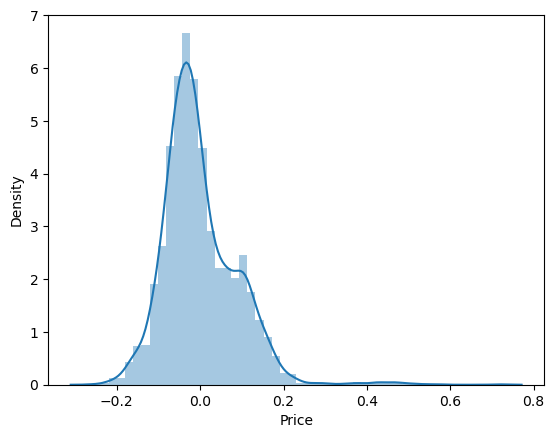

In [306]:
##lets built Linear Regression model
predict(LinearRegression())

In [307]:
# Let's perform hypertuning the model 
tuned_model=RandomForestRegressor()
np.linspace(start=100,stop=1200,num=6)
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=4)]
min_samples_split=[5,10,15,100]


In [308]:
param_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split}
print(param_grid)
print("*"*90)

tuned=RandomizedSearchCV(estimator=tuned_model,param_distributions=param_grid,cv=3,n_jobs=-1,verbose=2)
tuned.fit(X_train,y_train)

{'n_estimators': [100, 320, 540, 760, 980, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 13, 21, 30], 'min_samples_split': [5, 10, 15, 100]}
******************************************************************************************
Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [309]:
tuned.best_estimator_

RandomForestRegressor(max_depth=21, max_features='auto', min_samples_split=15,
                      n_estimators=980)

In [310]:
tuned.best_params_

{'n_estimators': 980,
 'min_samples_split': 15,
 'max_features': 'auto',
 'max_depth': 21}

In [311]:
tuned.best_score_

0.6276159244925158

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Traning Score : 0.7801423110800475
Predicitions are : [0.15391615 0.40391231 0.15794783 ... 0.21828543 0.13937498 0.23043445]


r2_score is : 0.6162208616575164
MAE is : 0.055558271461843
MSE is : 0.005564740500530154
RMSE is : 0.0745971882883675
MAPE is : 40.690323875931234


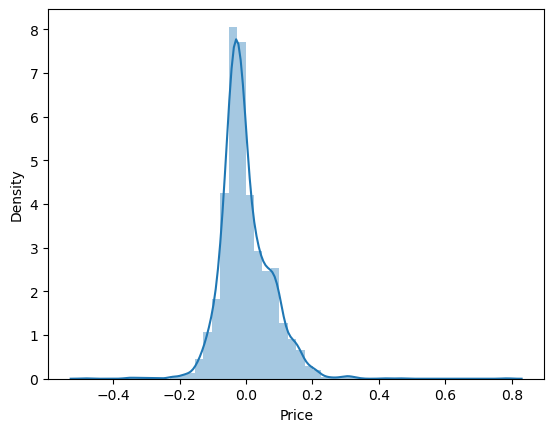

In [312]:
predict(tuned)

In [313]:
tree1=tuned.best_estimator_
tree1.fit(X_train,y_train)

RandomForestRegressor(max_depth=13, max_features='auto', min_samples_split=10,
                      n_estimators=760)

In [314]:
y_pred_train_dt=tree1.predict(X_train)
y_pred_test_dt=tree1.predict(X_test)

In [315]:
tree1.feature_importances_

array([0.13290778, 0.01998279, 0.02175063, 0.13716674, 0.0634017 ,
       0.03041768, 0.02553043, 0.03282996, 0.02493046, 0.47269113,
       0.02302285, 0.00327789, 0.00549677, 0.0021557 , 0.00134965,
       0.00308786])

In [316]:
tree1_feature_imp = pd.DataFrame(tree1.feature_importances_, index = X_train.columns, columns = ['Feature_importance'])

tree1_feature_imp.sort_values(by = 'Feature_importance', ascending = False, inplace=True)

tree1_feature_imp

,Feature_importance
Duration_hours,0.472691
Journey_day,0.137167
Airline,0.132908
Journey_month,0.063402
Arrival_Time_hour,0.032830
Dep_Time_hour,0.030418
Dep_Time_minute,0.025530
Arrival_Time_minute,0.024930
Duration_minutes,0.023023
Total_Stops,0.021751


In [317]:
tree2=RandomForestRegressor()
x_train_dt=X_train[top_features_dt1]
x_test_dt=X_test[top_features_dt1]

In [318]:
x_train_dt.head()

,Duration_hours,Airline,Journey_day,Journey_month,Arrival_Time_hour,Dep_Time_hour,Dep_Time_minute,Arrival_Time_minute,Destination,Total_Stops,Duration_minutes,Source_Kolkata,Source_Mumbai,Source_Banglore,Source_Chennai,Source_Delhi
7924,0.319149,0.181818,0.423077,0.666667,1.000000,0.304348,0.636364,0.545455,0.75,0.25,1.000000,1.0,0.0,0.0,0.0,0.0
12498,0.361702,0.909091,0.423077,0.000000,0.695652,0.956522,1.000000,0.181818,0.50,0.25,0.272727,0.0,0.0,1.0,0.0,0.0
8992,0.191489,0.909091,0.653846,0.000000,0.695652,0.304348,0.000000,0.181818,0.50,0.25,0.181818,0.0,0.0,1.0,0.0,0.0
7722,0.042553,0.636364,0.653846,0.666667,1.000000,0.869565,0.818182,0.363636,0.75,0.00,0.636364,1.0,0.0,0.0,0.0,0.0
3033,0.468085,0.909091,0.192308,0.000000,0.826087,0.869565,0.636364,0.181818,0.50,0.25,0.636364,0.0,0.0,1.0,0.0,0.0


In [319]:
# Using randomized search CV for finding out the best hyper parameters

params = {'criterion':['mse','friedman_mse','mae','poisson'],
          'max_depth':[2,5,10,20],
          'min_samples_split':[2,4,8,12],
          'min_samples_leaf':[2,4,8,10]}

RCV = RandomizedSearchCV(estimator=tree2, 
                         param_distributions=params, 
                         n_iter = 10, 
                         scoring='r2', 
                         cv = 10, 
                         verbose=2, 
                         random_state=42, 
                         n_jobs=-1, 
                         return_train_score=True)

RCV.fit(x_train_dt,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'friedman_mse',
                                                      'mae', 'poisson'],
                                        'max_depth': [2, 5, 10, 20],
                                        'min_samples_leaf': [2, 4, 8, 10],
                                        'min_samples_split': [2, 4, 8, 12]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=2)

In [320]:
RCV.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_depth': 10,
 'criterion': 'poisson'}

In [321]:
RCV.best_estimator_

RandomForestRegressor(criterion='poisson', max_depth=10, min_samples_leaf=4)

In [322]:
RCV.best_score_

0.6316770597660882

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Traning Score : 0.7282053999422403
Predicitions are : [0.15848909 0.40364829 0.15022442 ... 0.21501936 0.13608153 0.21187997]


r2_score is : 0.6078750863195085
MAE is : 0.05634151547920487
MSE is : 0.005685753003274098
RMSE is : 0.0754039322799156
MAPE is : 40.657641754545764


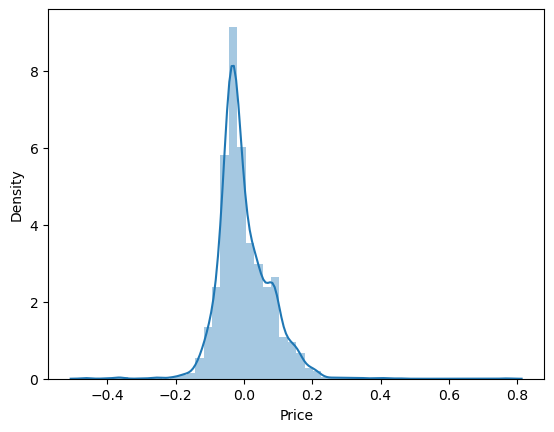

In [323]:
predict(RCV)

In [329]:
import sklearn.externals as extjoblib
import joblib

# Save the model as a pickle in a file
joblib.dump(model,"RandomForest.pkl")
joblib.dump(tree2,"tree2.pkl")

['tree2.pkl']

In [330]:
model=joblib.load("tree2.pkl")

In [353]:
input_val = [2599,278,284,2348,2020,2323,292,980,232,6665,6789,7414,8526,9657,7458,8874]
final_features = [np.array(input_val)]
df = pd.DataFrame(final_features)

output = model.predict(df)
result = "%.2f" % round(output[0], 4)
result

'0.29'

In [354]:
x_train_dt.iloc[0,:]

Duration_hours         0.319149
Airline                0.181818
Journey_day            0.423077
Journey_month          0.666667
Arrival_Time_hour      1.000000
Dep_Time_hour          0.304348
Dep_Time_minute        0.636364
Arrival_Time_minute    0.545455
Destination            0.750000
Total_Stops            0.250000
Duration_minutes       1.000000
Source_Kolkata         1.000000
Source_Mumbai          0.000000
Source_Banglore        0.000000
Source_Chennai         0.000000
Source_Delhi           0.000000
Name: 7924, dtype: float64

In [355]:
y_train.iloc[0]

0.10840512648786874